In [1]:
# 📘 CollegeFinder.ipynb
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Enhanced Dataset
df = pd.read_csv("enhanced_college_dataset.csv")
print(f"✅ Loaded {len(df)} colleges")

# Step 3: Preview Data
df.head()

✅ Loaded 3000 colleges


,name,state,stream,fees,student_rating,placement_rate,industry_tieups,location
0,National Institute of Technology Trichy,Uttar Pradesh,Management,209281,3.0,69,No,Semi-Urban
1,Indian Institute of Science,Punjab,Engineering,348796,3.4,89,No,Urban
2,Vellore Institute of Technology,Uttar Pradesh,Engineering,198044,3.0,89,Yes,Rural
3,Indian Institute of Science,Uttar Pradesh,Medical,346399,2.9,77,Yes,Urban
4,Shiv Nadar University,Andhra Pradesh,Commerce,352188,3.9,41,No,Urban


In [2]:
# Step 4: Check for Nulls and Data Types
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             3000 non-null   object 
 1   state            3000 non-null   object 
 2   stream           3000 non-null   object 
 3   fees             3000 non-null   int64  
 4   student_rating   3000 non-null   float64
 5   placement_rate   3000 non-null   int64  
 6   industry_tieups  3000 non-null   object 
 7   location         3000 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 187.6+ KB


name               0
state              0
stream             0
fees               0
student_rating     0
placement_rate     0
industry_tieups    0
location           0
dtype: int64

In [3]:
# Step 5: Clean Data (if needed)
# For demo purposes, let's drop nulls (or you can fill them)
df = df.dropna()

# Ensure numeric columns are of correct type
df["fees"] = pd.to_numeric(df["fees"], errors='coerce')
df["student_rating"] = pd.to_numeric(df["student_rating"], errors='coerce')
df["placement_rate"] = pd.to_numeric(df["placement_rate"], errors='coerce')

In [4]:
# Step 6: Sample Query: Filter by Stream, State, and Budget
def filter_colleges(stream=None, state=None, max_fees=None):
    filtered = df.copy()

    if stream:
        filtered = filtered[filtered['stream'].str.lower() == stream.lower()]
    if state:
        filtered = filtered[filtered['state'].str.lower() == state.lower()]
    if max_fees:
        filtered = filtered[filtered['fees'] <= max_fees]

    return filtered.reset_index(drop=True)

# Example:
filtered_df = filter_colleges(stream="Engineering", state="Maharashtra", max_fees=200000)
filtered_df.head(10)

,name,state,stream,fees,student_rating,placement_rate,industry_tieups,location
0,Birla Institute of Technology and Science,Maharashtra,Engineering,190162,2.8,94,Yes,Urban
1,Shiv Nadar University,Maharashtra,Engineering,189285,3.1,74,No,Semi-Urban
2,Indian Institute of Management Ahmedabad,Maharashtra,Engineering,86293,3.9,88,No,Semi-Urban
3,Christ University,Maharashtra,Engineering,100187,3.3,79,No,Rural
4,Christ University,Maharashtra,Engineering,127438,4.8,89,Yes,Rural
5,SRM Institute of Science and Technology,Maharashtra,Engineering,94129,3.3,49,Yes,Rural


C:\Users\Arithra Mayur\AppData\Local\Temp\ipykernel_2504\1087653462.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="stream", y="fees", estimator="mean", ci=None)


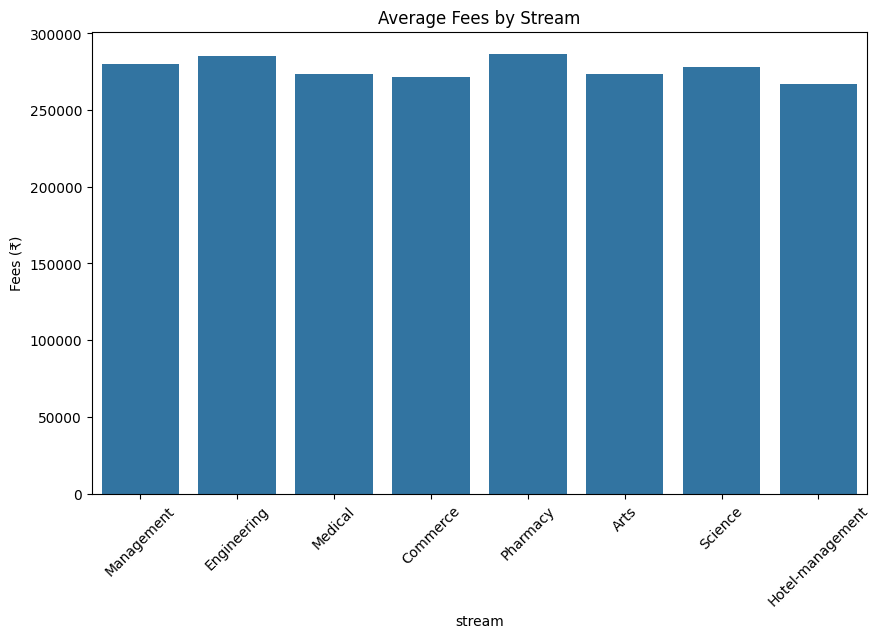

In [5]:
# Step 7: Visualize Average Fees by Stream
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="stream", y="fees", estimator="mean", ci=None)
plt.title("Average Fees by Stream")
plt.xticks(rotation=45)
plt.ylabel("Fees (₹)")
plt.show()

In [6]:
# Step 9: Top Rated Colleges (Overall)
top_colleges = df.sort_values(by=["student_rating", "placement_rate"], ascending=False).head(10)
top_colleges[["name", "state", "stream", "student_rating", "placement_rate", "fees"]]

,name,state,stream,student_rating,placement_rate,fees
2585,Indian Institute of Science,Odisha,Engineering,5.0,98,348427
2185,Narsee Monjee Institute of Management Studies,Tamil Nadu,Medical,5.0,97,230437
2489,Banaras Hindu University,Karnataka,Medical,5.0,97,146858
907,Banaras Hindu University,Karnataka,Medical,5.0,96,368463
1404,Shiv Nadar University,West Bengal,Management,5.0,95,310458
687,Vellore Institute of Technology,Punjab,Management,5.0,94,358999
1342,SRM Institute of Science and Technology,Karnataka,Science,5.0,93,166141
2990,Christ University,Tamil Nadu,Arts,5.0,92,298853
2574,Banaras Hindu University,Maharashtra,Arts,5.0,91,263269
526,Indian Institute of Technology Bombay,Haryana,Management,5.0,90,445100


In [7]:
# Step 10: Export filtered data (optional for backend use)
filtered_df.to_csv("filtered_colleges.csv", index=False)
print("✅ Exported to filtered_colleges.csv")

✅ Exported to filtered_colleges.csv
